ML Model for Soccer Players

Attempting to model the price of players based on stats

In [1]:
import pandas as pd
import numpy as np
from scipy import *
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance

from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Import data
games_df = pd.read_csv('games.csv')
players_df = pd.read_csv('players.csv')
valuations_df = pd.read_csv('player_valuations.csv')
appearances_df = pd.read_csv('appearances.csv')

In [3]:
# Create dataframe with each required column
mrkt_value_df = players_df[['highest_market_value_in_eur', 'player_id']]

players_df = players_df[(players_df['height_in_cm']>100)]
players_df = players_df[['player_id', 'height_in_cm', 'position', 'foot']]
# Change categorical variables
players_df = players_df.replace(['Attack', 'Defender', 'Midfield', 'Goalkeeper'], [1, 2, 3, 4])
players_df = players_df[players_df['position'] != 'Missing']
players_df = players_df.replace(['right','left', 'both'], [1, 2, 3])

game_stats = appearances_df[['player_id', 'yellow_cards', 'red_cards', 'goals', 'assists']]
game_stats = game_stats.groupby(game_stats['player_id']).aggregate('sum')
game_stats = game_stats.sort_values('player_id')

# print(game_stats)
# print(mrkt_value_df)
# game_stats = players_df.set_index('player_id').join(game_stats.set_index('player_id'))
game_stats = pd.merge(game_stats, players_df, on='player_id')
all_stats = pd.merge(game_stats, mrkt_value_df, on='player_id')
print(all_stats)

all_stats = all_stats.dropna()

       player_id  yellow_cards  red_cards  goals  assists  height_in_cm  \
0             10            19          0     48       24         184.0   
1             26             4          2      0        0         190.0   
2             80             0          0      0        0         194.0   
3            132            13          0      9        4         179.0   
4            215             3          0     26        8         193.0   
...          ...           ...        ...    ...      ...           ...   
22886    1143811             1          0      0        0         181.0   
22887    1143823             0          0      0        0         173.0   
22888    1159449             0          0      0        0         180.0   
22889    1163778             0          0      0        1         193.0   
22890    1166093             1          0      1        0         182.0   

       position  foot  highest_market_value_in_eur  
0             1   1.0                   300000

In [4]:
# Partition Data
X = all_stats[['yellow_cards', 'red_cards', 'goals', 'assists', 'height_in_cm', 'position', 'foot']]
y = all_stats['highest_market_value_in_eur']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3, train_size=0.7) 

In [5]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming X_train, y_train, X_test, and y_test are already defined

# KNN Model for Regression
k = 100

knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error
rmse = np.sqrt(mse)                      # Calculate Root Mean Squared Error
r2 = r2_score(y_test, y_pred)            # Calculate R² Score

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)


Mean Squared Error: 76189205939309.33
Root Mean Squared Error: 8728642.84635987
R² Score: 0.3648139402709947


In [6]:
# Random Tree Model
rf = RandomForestRegressor(random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('The mse is {}'.format(round(mse,2)))

The mse is 76120289345362.03


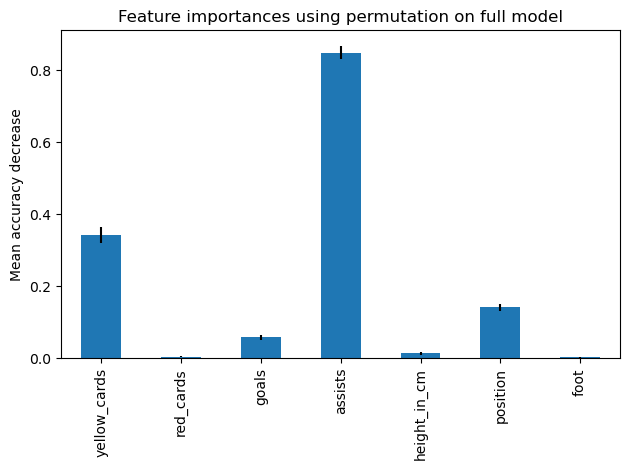

In [7]:
# Feature Importance
result = permutation_importance(
    rf, X_test, y_test, random_state=1
)
feature_names = ['yellow_cards', 'red_cards', 'goals', 'assists', 'height_in_cm', 'position', 'foot']
rf_importances = pd.Series(result.importances_mean, index=feature_names)

fig, ax = plt.subplots()
rf_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [8]:
# SVM
scaler = StandardScaler()
scaler.fit(X_train[['yellow_cards', 'red_cards', 'goals', 'assists', 'height_in_cm', 'position', 'foot']])

X_train[['yellow_cards', 'red_cards', 'goals', 'assists', 'height_in_cm', 'position', 'foot']] = scaler.transform(X_train[['yellow_cards', 'red_cards', 'goals', 'assists', 'height_in_cm', 'position', 'foot']])

svm = SVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print('The accuracy of the model is: {}'.format(svm.score(X_test, y_test)))

The accuracy of the model is: 0.04637157482685938
